In [24]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mysql.connector import connect

%matplotlib inline
myfont = fm.FontProperties(
    fname=r"D:\Projects\python_projects\JD_crawl_synthesis\libs\msyh.ttf")
mpl.rcParams['font.family'] = [myfont.get_name()]
# mpl.use('agg')

In [25]:
mydb = connect(host="localhost", user="root", passwd="123456", database='jd')
print(mydb)

In [26]:
comment_sql = "select good_count, general_count, poor_count from `jd`.`goods_comment_summary` where goods_id=100002183459;"
df = pd.read_sql(comment_sql, mydb)
df

,good_count,general_count,poor_count
0,27629,227,282


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   good_count     1 non-null      int64
 1   general_count  1 non-null      int64
 2   poor_count     1 non-null      int64
dtypes: int64(3)
memory usage: 152.0 bytes


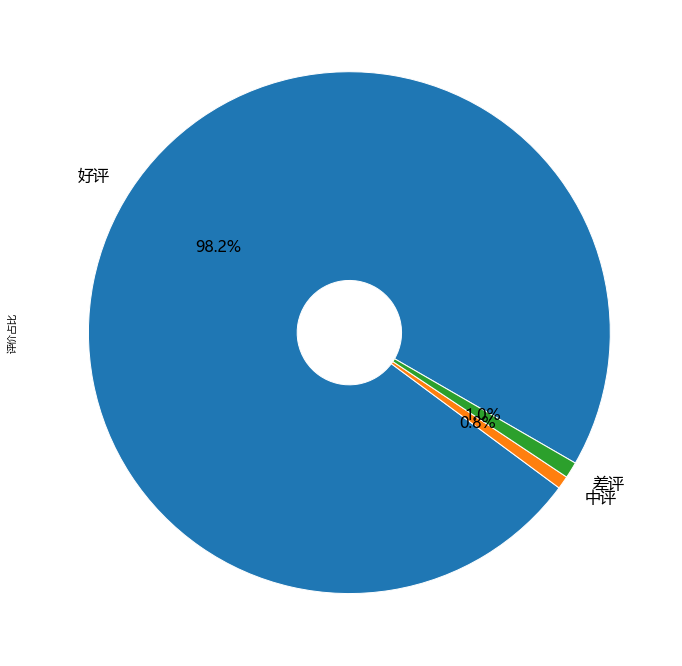

In [55]:
s = df.iloc[0]
s.rename('评价占比', inplace=True)
s.rename(index={
    'good_count': '好评',
    'general_count': '中评',
    'poor_count': '差评'
},
         inplace=True)
s.plot(kind='pie',
       figsize=(12, 12),
       autopct='%.1f%%',
       wedgeprops=dict(width=0.8, edgecolor='w'),
       startangle=-30,
       fontsize=16)